In [ ]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
def list_dataset():
    for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/garbage_classification_real'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

# Add class name prefix to each path based on class name include in filename
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df


def class_id_to_label(id):
    label_map = {1: 'glass', 2: 'paper', 3: 'cardboard', 4: 'plastic', 5: 'metal', 6: 'trash'}
    return label_map[id]


In [ ]:
# 파일 unzip
'''
path_to_zip_file = '/content/drive/MyDrive/Colab Notebooks/dataset.zip'
directory_to_extract_to = '/content/drive/MyDrive/DATASET_GARBAGE/input'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

'''

"\npath_to_zip_file = '/content/drive/MyDrive/Colab Notebooks/dataset.zip'\ndirectory_to_extract_to = '/content/drive/MyDrive/DATASET_GARBAGE/input'\n\nimport zipfile\nwith zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:\n    zip_ref.extractall(directory_to_extract_to)\n\n"

In [ ]:
IMAGES_DIR = "/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/garbage_classification_real/"

train_file = '/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/one-indexed-files-notrash_train.txt'
val_file   = '/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/one-indexed-files-notrash_val.txt'
test_file  = '/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/one-indexed-files-notrash_test.txt'

df_train = pd.read_csv(train_file, sep=' ', header=None, names=['filename', 'category'])
df_valid = pd.read_csv(val_file,   sep=' ', header=None, names=['filename', 'category'])
df_test  = pd.read_csv(test_file,   sep=' ', header=None, names=['filename', 'category'])

df_train = add_class_name_prefix(df_train, 'filename')
df_valid = add_class_name_prefix(df_valid, 'filename')
df_test  = add_class_name_prefix(df_test,  'filename')

df_train['category_str'] = df_train['category'].apply(class_id_to_label)
df_valid['category_str'] = df_valid['category'].apply(class_id_to_label)
df_test['category_str']  = df_test['category'].apply(class_id_to_label)

df_train['category'] = df_train['category']-1
df_valid['category'] = df_valid['category']-1
df_test['category']  = df_test['category']-1

print(f'Found {len(df_train)} training, {len(df_valid)} validation and {len(df_test)} samples.')

Found 1768 training, 328 validation and 431 samples.


In [ ]:
df_test

,filename,category,category_str
0,paper/paper70.jpg,1,paper
1,paper/paper380.jpg,1,paper
2,cardboard/cardboard31.jpg,2,cardboard
3,glass/glass12.jpg,0,glass
4,paper/paper169.jpg,1,paper
...,...,...,...
426,metal/metal389.jpg,4,metal
427,paper/paper303.jpg,1,paper
428,paper/paper405.jpg,1,paper
429,paper/paper465.jpg,1,paper


In [ ]:
# 이미지 데이터를 로드하기 위한 ImageDataGenerator 객체 생성
datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip = True,
    width_shift_range=0.2,
    height_shift_range=0.2

)

# 이미지 데이터를 로드하고 증강 작업을 수행하는 함수
def augment_images(dataframe,  save_directory):
    for i in range(len(dataframe['filename'])):
        # 이미지 파일의 클래스/레이블 추출
        path = os.path.join(IMAGES_DIR + dataframe['filename'][i])
        label = os.path.basename(os.path.dirname(path))
        # label = dataframe['rel_path']

        # 이미지 파일 로드
        image = load_img(path)
        image_array = img_to_array(image)

        # 이미지 증강을 위해 배열 형태로 변환
        image_array = image_array.reshape((1,) + image_array.shape)

        # 증강된 이미지 저장 경로 생성
        class_directory = os.path.join(save_directory, label)
        os.makedirs(class_directory, exist_ok=True)

        # 이미지 증강 수행 및 저장
        i = 0
        for batch in datagen.flow(image_array, save_to_dir=class_directory, save_prefix=label, save_format='jpg'):
            i += 1
            if i >= 1:  # 증강할 이미지 수 지정
                break

        # 원본 이미지 저장
        image.save(os.path.join(class_directory, os.path.basename(path)))



In [ ]:
# train dataset 이미지 증강 수행 및 저장
save_directory = '/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/train'

# 실제로는 밑에꺼 주석 풀고 돌려야 함.
# augment_images(df_train, save_directory)

In [ ]:
'''
# Creating a dictionary from 6 classes
categories={}
i=-1
for dirname, _, filenames in os.walk(save_directory):
    for filename in filenames:
        categories[i] = dirname.split('/')[-1]
        break
#         print(os.path.join(dirname, filename))
    i += 1
print(categories)
'''


"\n# Creating a dictionary from 6 classes\ncategories={}\ni=-1\nfor dirname, _, filenames in os.walk(save_directory):\n    for filename in filenames:\n        categories[i] = dirname.split('/')[-1]\n        break\n#         print(os.path.join(dirname, filename))\n    i += 1\nprint(categories)\n"

In [ ]:
# Add class name prefix to filename. So for example "/paper104.jpg" become "paper/paper104.jpg"

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

# train dataset

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

label_map = {0: 'glass', 1: 'paper', 2: 'cardboard', 3: 'plastic', 4: 'metal', 5: 'trash'}

for category in label_map:
    filenames = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/train/' + label_map[category])
    filenames_list = filenames_list  + filenames
    categories_list = categories_list + [category] * len(filenames)

df_train_new = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

'''
for category in categories:
    filenames = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/train/' + categories[category])
    filenames_list = filenames_list  + filenames
    categories_list = categories_list + [category] * len(filenames)

df_train_new = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})
'''
df_train_new = add_class_name_prefix(df_train_new, 'filename')

In [ ]:
df_train_new

,filename,category
0,glass_/glass_0_4880.jpg,0
1,glass/glass189.jpg,0
2,glass_/glass_0_5695.jpg,0
3,glass/glass325.jpg,0
4,glass_/glass_0_2254.jpg,0
...,...,...
3508,trash/trash58.jpg,5
3509,trash_/trash_0_4846.jpg,5
3510,trash/trash74.jpg,5
3511,trash_/trash_0_5875.jpg,5


In [ ]:
def remove_underscore_before_slash(string):
    return string.replace('_/', '/')

df_train_new_list = []
for i in range(len(df_train_new['filename'])):
  if '_' in df_train_new['filename'][i]:
    df_train_new_list.append(remove_underscore_before_slash(df_train_new['filename'][i]))

  else:
    df_train_new_list.append(df_train_new['filename'][i])

df_train_new['filename'] = df_train_new_list

In [ ]:
df_train_new

,filename,category
0,glass/glass_0_4880.jpg,0
1,glass/glass189.jpg,0
2,glass/glass_0_5695.jpg,0
3,glass/glass325.jpg,0
4,glass/glass_0_2254.jpg,0
...,...,...
3508,trash/trash58.jpg,5
3509,trash/trash_0_4846.jpg,5
3510,trash/trash74.jpg,5
3511,trash/trash_0_5875.jpg,5


In [ ]:
'''
# valid dataset

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(IMAGES_DIR + categories[category])
    filenames_list = filenames_list  + filenames
    categories_list = categories_list + [category] * len(filenames)

df_valid_new = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df_valid_new = add_class_name_prefix(df_valid_new, 'filename')
'''

"\n# valid dataset\n\n# list conatining all the filenames in the dataset\nfilenames_list = []\n# list to store the corresponding category, note that each folder of the dataset has one class of data\ncategories_list = []\n\nfor category in categories:\n    filenames = os.listdir(IMAGES_DIR + categories[category])\n    filenames_list = filenames_list  + filenames\n    categories_list = categories_list + [category] * len(filenames)\n    \ndf_valid_new = pd.DataFrame({\n    'filename': filenames_list,\n    'category': categories_list\n})\n\ndf_valid_new = add_class_name_prefix(df_valid_new, 'filename')\n"

In [ ]:
'''
df_valid_new_list = []
for i in range(len(df_valid_new['filename'])):
  if '_' in df_valid_new['filename'][i]:
    df_valid_new_list.append(remove_underscore_before_slash(df_valid_new['filename'][i]))

  else:
    df_valid_new_list.append(df_valid_new['filename'][i])

df_valid_new['filename'] = df_valid_new_list
'''

"\ndf_valid_new_list = []\nfor i in range(len(df_valid_new['filename'])):\n  if '_' in df_valid_new['filename'][i]:\n    df_valid_new_list.append(remove_underscore_before_slash(df_valid_new['filename'][i]))\n    \n  else: \n    df_valid_new_list.append(df_valid_new['filename'][i])\n\ndf_valid_new['filename'] = df_valid_new_list\n"

In [ ]:
'''
# test dataset

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/test/' + categories[category])
    filenames_list = filenames_list  + filenames
    categories_list = categories_list + [category] * len(filenames)

df_test_new = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df_test_new = add_class_name_prefix(df_test_new, 'filename')
'''

"\n# test dataset\n\n# list conatining all the filenames in the dataset\nfilenames_list = []\n# list to store the corresponding category, note that each folder of the dataset has one class of data\ncategories_list = []\n\nfor category in categories:\n    filenames = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/test/' + categories[category])\n    filenames_list = filenames_list  + filenames\n    categories_list = categories_list + [category] * len(filenames)\n    \ndf_test_new = pd.DataFrame({\n    'filename': filenames_list,\n    'category': categories_list\n})\n\ndf_test_new = add_class_name_prefix(df_test_new, 'filename')\n"

In [ ]:
'''
df_test_new_list = []
for i in range(len(df_test_new['filename'])):
  if '_' in df_test_new['filename'][i]:
    df_test_new_list.append(remove_underscore_before_slash(df_test_new['filename'][i]))

  else:
    df_test_new_list.append(df_test_new['filename'][i])

df_test_new['filename'] = df_test_new_list
'''

"\ndf_test_new_list = []\nfor i in range(len(df_test_new['filename'])):\n  if '_' in df_test_new['filename'][i]:\n    df_test_new_list.append(remove_underscore_before_slash(df_test_new['filename'][i]))\n    \n  else: \n    df_test_new_list.append(df_test_new['filename'][i])\n\ndf_test_new['filename'] = df_test_new_list\n"

In [ ]:
print(f'Found {len(df_train_new)} train, {len(df_valid)} validation and {len(df_test)} test.')

Found 3513 train, 328 validation and 431 test.


In [ ]:
import pandas as pd
df_test.sort_values('category')

,filename,category,category_str
314,glass/glass148.jpg,0,glass
280,glass/glass139.jpg,0,glass
137,glass/glass297.jpg,0,glass
288,glass/glass426.jpg,0,glass
133,glass/glass59.jpg,0,glass
...,...,...,...
366,trash/trash109.jpg,5,trash
55,trash/trash29.jpg,5,trash
42,trash/trash46.jpg,5,trash
309,trash/trash93.jpg,5,trash


In [ ]:
# 데이터셋 순서 섞기

def df_suffled(df):
  return(df.sample(frac=1).reset_index(drop=True))

df_train_new = df_suffled(df_train_new)
df_valid = df_suffled(df_valid)
df_test = df_suffled(df_test)

In [ ]:
df_train_new = df_train_new[0:2200]
df_train_new

,filename,category
0,glass/glass_0_8006.jpg,0
1,glass/glass_0_7738.jpg,0
2,glass/glass_0_4779.jpg,0
3,trash/trash_0_7636.jpg,5
4,trash/trash22.jpg,5
...,...,...
2195,cardboard/cardboard_0_2553.jpg,2
2196,plastic/plastic197.jpg,3
2197,paper/paper_0_3748.jpg,1
2198,glass/glass_0_300.jpg,0


In [ ]:
df_train_new

,filename,category
0,glass/glass_0_8006.jpg,0
1,glass/glass_0_7738.jpg,0
2,glass/glass_0_4779.jpg,0
3,trash/trash_0_7636.jpg,5
4,trash/trash22.jpg,5
...,...,...
2195,cardboard/cardboard_0_2553.jpg,2
2196,plastic/plastic197.jpg,3
2197,paper/paper_0_3748.jpg,1
2198,glass/glass_0_300.jpg,0


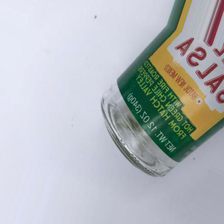

In [ ]:
# X dataset 생성: image를 array 형식으로 만들기
# X_train, X_valid, X_test

from tensorflow.python.ops.math_ops import Xdivy
import numpy as np
from PIL import Image

# X_train
X_train = []
for i in range(len(df_train_new['filename'])):
  path = os.path.join('/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/train/' + df_train_new['filename'][i])
  img = Image.open(path)
  img = img.resize((224,224),Image.ANTIALIAS)
  x = np.array(img)

  X_train.append(x)

img_2 = Image.fromarray(X_train[0]) # NumPy array to PIL image
img_2.show()

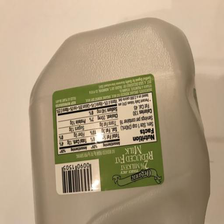

In [ ]:
# X_valid
X_valid = []
for i in range(len(df_valid['filename'])):
  path = os.path.join(IMAGES_DIR + df_valid['filename'][i])
  img = Image.open(path)
  img = img.resize((224,224),Image.ANTIALIAS)
  x = np.array(img)

  X_valid.append(x)

img_2 = Image.fromarray(X_valid[0]) # NumPy array to PIL image
img_2.show()

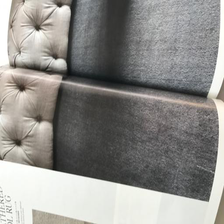

In [ ]:
# X_test
X_test = []
for i in range(len(df_test['filename'])):
  path = os.path.join(IMAGES_DIR + df_test['filename'][i])
  img = Image.open(path)
  img = img.resize((224,224),Image.ANTIALIAS)
  x = np.array(img)

  X_test.append(x)

img_2 = Image.fromarray(X_test[0]) # NumPy array to PIL image
img_2.show()

In [ ]:
# Y dataset 생성
# Y_train, Y_valid, Y_test

# Y_train
Y_train = []
for i in range(len(df_train_new['filename'])):
  Y_train.append(df_train_new['category'][i])

print(Y_train)
print(len(Y_train))

# Y_valid
Y_valid = []
for i in range(len(df_valid['filename'])):
  Y_valid.append(df_valid['category'][i])

print(Y_valid)
print(len(Y_valid))

# Y_test
Y_test = []
for i in range(len(df_test['filename'])):
  Y_test.append(df_test['category'][i])

print(Y_test)
print(len(Y_test))


[0, 0, 0, 5, 5, 3, 3, 1, 4, 1, 4, 3, 1, 2, 3, 0, 2, 3, 4, 3, 1, 1, 3, 5, 5, 2, 1, 4, 1, 4, 2, 0, 2, 3, 0, 2, 3, 1, 4, 4, 1, 1, 4, 2, 2, 0, 1, 2, 0, 3, 1, 3, 2, 3, 1, 3, 1, 2, 1, 4, 1, 3, 3, 0, 0, 1, 2, 4, 4, 3, 2, 1, 3, 2, 2, 3, 4, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 4, 0, 2, 0, 0, 3, 2, 0, 5, 3, 1, 3, 4, 1, 4, 0, 3, 4, 2, 2, 3, 1, 0, 0, 4, 0, 4, 4, 0, 1, 1, 3, 2, 0, 0, 4, 3, 0, 0, 5, 1, 3, 0, 5, 2, 1, 2, 0, 5, 2, 0, 1, 3, 3, 1, 4, 1, 4, 2, 3, 2, 3, 2, 1, 0, 3, 1, 2, 1, 0, 4, 2, 0, 1, 4, 4, 1, 0, 4, 1, 0, 2, 0, 1, 2, 1, 4, 0, 4, 0, 1, 0, 4, 0, 3, 2, 0, 4, 2, 2, 1, 4, 1, 4, 3, 0, 4, 3, 0, 0, 0, 3, 1, 0, 0, 3, 1, 0, 5, 0, 3, 2, 2, 1, 2, 1, 5, 4, 1, 1, 4, 1, 2, 3, 1, 1, 0, 0, 0, 4, 0, 1, 1, 0, 4, 4, 0, 4, 4, 5, 2, 0, 3, 4, 1, 1, 2, 1, 2, 5, 3, 4, 4, 3, 2, 0, 1, 1, 3, 0, 0, 2, 1, 2, 3, 0, 1, 4, 3, 3, 1, 4, 1, 4, 4, 0, 3, 0, 1, 3, 2, 2, 0, 3, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 3, 0, 1, 2, 1, 1, 1, 1, 3, 0, 0, 1, 4, 2, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 3, 3, 1, 4, 0, 4, 0, 4, 3, 0, 1, 3, 4, 3, 

In [ ]:
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

for i, img_path in enumerate(df_train.rel_path.sample(n=6, random_state=123)):
    img = load_img(IMAGES_DIR+img_path)
    img = img_to_array(img, dtype=np.uint8)

    #plt.figure(figsize = (5,5))
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())
'''

'\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img\n\nfor i, img_path in enumerate(df_train.rel_path.sample(n=6, random_state=123)):\n    img = load_img(IMAGES_DIR+img_path)\n    img = img_to_array(img, dtype=np.uint8)\n    \n    #plt.figure(figsize = (5,5))\n    plt.subplot(2, 3, i+1)\n    plt.imshow(img.squeeze())\n'

In [ ]:
# array로 변환
X_train = np.array(X_train, ndmin=2)
X_valid = np.array(X_valid, ndmin=2)
X_test = np.array(X_test, ndmin=2)
Y_train = np.array(Y_train, ndmin=1)
Y_valid = np.array(Y_valid, ndmin=1)
Y_test = np.array(Y_test, ndmin=1)

# shape 조절
len_train_X = len(X_train)
len_validate_X = len(X_valid)
len_test_X = len(X_test)

X_train = X_train.reshape(len_train_X,3*224*224)
X_valid = X_valid.reshape(len_validate_X,3*224*224)
X_test = X_test.reshape(len_test_X,3*224*224)

In [ ]:
X_train.shape

(2200, 150528)

In [ ]:
# Normalize the images. (0~1)

X_train = (X_train / 255)
X_valid = (X_valid / 255)
X_test = (X_test / 255)

SVM 학습

validation data를 통해 최적의 모델 선정

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
model()

NameError: ignored

kernel = 'linear'

In [ ]:
svc0001_linear = SVC(kernel='linear',gamma='auto', verbose=True, C=0.001)
svc0001_linear.fit(X_train, Y_train)
y0001_linear = svc0001_linear.predict(X_valid)

print("\nlinear, C: 0.001")
print("Valid F1 score: ", f1_score(Y_valid, y0001_linear, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y0001_linear))

In [ ]:
svc10_linear = SVC(kernel='linear',gamma='auto', verbose=True, C=10)
svc10_linear.fit(X_train, Y_train)
y10_linear = svc10_linear.predict(X_valid)

print("\nlinear, C: 10")
print("Valid F1 score: ", f1_score(Y_valid, y10_linear, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y10_linear))

In [ ]:
svc30_linear = SVC(kernel='linear',gamma='auto', verbose=True, C=30)
svc30_linear.fit(X_train, Y_train)
y30_linear = svc30_linear.predict(X_valid)

print("\nlinear, C: 30")
print("Valid F1 score: ", f1_score(Y_valid, y30_linear, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y30_linear))

poly

In [ ]:
svc_poly_0001 = SVC(kernel='poly',gamma='auto', verbose=True, C=0.001)
svc_poly_0001.fit(X_train, Y_train)
y_poly_0001 = svc_poly_0001.predict(X_valid)

print("\npoly, C: 0.001")
print("Valid F1 score: ", f1_score(Y_valid, y_poly_0001, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_poly_0001))

In [ ]:
svc_poly_10 = SVC(kernel='poly',gamma='auto', verbose=True, C=10)
svc_poly_10.fit(X_train, Y_train)
y_poly_10 = svc_poly_10.predict(X_valid)

print("\npoly, C: 10")
print("Valid F1 score: ", f1_score(Y_valid, y_poly_10, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_poly_10))

In [ ]:
svc_poly_30 = SVC(kernel='poly',gamma='auto', verbose=True, C=30)
svc_poly_30.fit(X_train, Y_train)
y_poly_30 = svc_poly_30.predict(X_valid)

print("poly, C: 30")
print("Valid F1 score: ", f1_score(Y_valid, y_poly_30, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_poly_30))

rbf

In [ ]:
svc_rbf_0001 = SVC(kernel='rbf',gamma='auto', verbose=True, C=0.001)
svc_rbf_0001.fit(X_train, Y_train)
y_rbf_0001 = svc_rbf_0001.predict(X_valid)

print("\nrbf, C: 0.001")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_0001, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_0001))

In [ ]:
svc_rbf_10 = SVC(kernel='rbf',gamma='auto', verbose=True, C=10)
svc_rbf_10.fit(X_train, Y_train)
y_rbf_10 = svc_rbf_10.predict(X_valid)

print("\nrbf, C: 10")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_10, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_10))

In [ ]:
svc_rbf_30 = SVC(kernel='rbf',gamma='auto', verbose=True, C=30)
svc_rbf_30.fit(X_train, Y_train)
y_rbf_30 = svc_rbf_30.predict(X_valid)

print("\nrbf, C: 30")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_30, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_30))

sigmoid

In [ ]:
svc_sigmoid_0001 = SVC(kernel='sigmoid',gamma='auto', verbose=True, C=0.001)
svc_sigmoid_0001.fit(X_train, Y_train)
y_sigmoid_0001 = svc_sigmoid_0001.predict(X_valid)

print("\nsigmoid, C: 0.001")
print("Valid F1 score: ", f1_score(Y_valid, y_sigmoid_0001, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_sigmoid_0001))

In [ ]:
svc_sigmoid_10 = SVC(kernel='sigmoid',gamma='auto', verbose=True, C=10)
svc_sigmoid_10.fit(X_train, Y_train)
y_sigmoid_10 = svc_sigmoid_10.predict(X_valid)

print("\nsigmoid, C: 10")
print("Valid F1 score: ", f1_score(Y_valid, y_sigmoid_10, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_sigmoid_10))

In [ ]:
svc_sigmoid_30 = SVC(kernel='sigmoid',gamma='auto', verbose=True, C=30)
svc_sigmoid_30.fit(X_train, Y_train)
y_sigmoid_30 = svc_sigmoid_30.predict(X_valid)

print("\nsigmoid, C: 30")
print("Valid F1 score: ", f1_score(Y_valid, y_sigmoid_30, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_sigmoid_30))

가장 좋은 kernel은 rbf. gamma와 C를 최적화

In [ ]:
svc_rbf_35 = SVC(kernel='rbf',gamma='auto', verbose=True, C=35)
svc_rbf_35.fit(X_train, Y_train)
y_rbf_35 = svc_rbf_35.predict(X_valid)

print("\nrbf, C: 35, gamma=auto")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_35, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_35))

In [ ]:
svc_rbf_33 = SVC(kernel='rbf',gamma='auto', verbose=True, C=33)
svc_rbf_33.fit(X_train, Y_train)
y_rbf_33 = svc_rbf_33.predict(X_valid)

print("\nrbf, C: 33, gamma=auto")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_33, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_33))

In [ ]:
svc_rbf_34 = SVC(kernel='rbf',gamma='auto', verbose=True, C=34)
svc_rbf_34.fit(X_train, Y_train)
y_rbf_34 = svc_rbf_34.predict(X_valid)

print("\nrbf, C: 34, gamma=auto")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_34, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_34))

In [ ]:
svc_rbf_33_0001 = SVC(kernel='rbf',gamma=0.001, verbose=True, C=33)
svc_rbf_33_0001.fit(X_train, Y_train)
y_rbf_33_0001 = svc_rbf_33_0001.predict(X_valid)

print("\nrbf, C: 33, gamma=0.001")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_33_0001, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_33_0001))

In [ ]:
svc_rbf_33_0002 = SVC(kernel='rbf',gamma=0.002, verbose=True, C=33)
svc_rbf_33_0002.fit(X_train, Y_train)
y_rbf_33_0002 = svc_rbf_33_0002.predict(X_valid)

print("\nrbf, C: 33, gamma=0.002")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_33_0002, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_33_0002))

In [ ]:
svc_rbf_33_00005 = SVC(kernel='rbf',gamma=0.0005, verbose=True, C=33)
svc_rbf_33_00005.fit(X_train, Y_train)
y_rbf_33_00005 = svc_rbf_33_00005.predict(X_valid)

print("\nrbf, C: 33, gamma=0.0005")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_33_00005, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_33_00005))

[LibSVM]
rbf, C: 33, gamma=0.0005
Valid F1 score:  0.5235532146007552
Valid Accuracy:  0.5609756097560976


In [ ]:
svc_rbf_33_00001 = SVC(kernel='rbf',gamma=0.0001, verbose=True, C=33)
svc_rbf_33_00001.fit(X_train, Y_train)
y_rbf_33_00001 = svc_rbf_33_00001.predict(X_valid)

print("\nrbf, C: 33, gamma=0.0001")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_33_00001, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_33_00001))

[LibSVM]
rbf, C: 33, gamma=0.0001
Valid F1 score:  0.5492848910740159
Valid Accuracy:  0.5792682926829268


In [ ]:
svc_rbf_33_000001 = SVC(kernel='rbf',gamma=0.00001, verbose=True, C=33)
svc_rbf_33_000001.fit(X_train, Y_train)
y_rbf_33_000001 = svc_rbf_33_000001.predict(X_valid)

print("\nrbf, C: 33, gamma=0.00001")
print("Valid F1 score: ", f1_score(Y_valid, y_rbf_33_000001, average = "macro"))
print("Valid Accuracy: ", accuracy_score(Y_valid, y_rbf_33_000001))

가장 좋은 모델 test datset으로 성능 확인

accuracy와 f1 score 확인

In [ ]:
y_rbf_33_00001_test = svc_rbf_33_00001.predict(X_test)

print("\nrbf, C: 33, gamma=0.0001")
print("Test F1 score: ", f1_score(Y_test, y_rbf_33_00001_test, average = "macro"))
print("Test Accuracy: ", accuracy_score(Y_test, y_rbf_33_00001_test))


rbf, C: 33, gamma=0.0001
Test F1 score:  0.6184737225287003
Test Accuracy:  0.6264501160092807


confusion matrix

In [ ]:
class_names = ['cardboard', 'paper', 'glass', 'metal', 'trash', 'plastic']
class_names = np.array(class_names, dtype='<U10')
print(class_names)

['cardboard' 'paper' 'glass' 'metal' 'trash' 'plastic']


In [ ]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

   cardboard       0.49      0.51      0.50        82
       paper       0.66      0.79      0.72       108
       glass       0.77      0.66      0.71        70
       metal       0.59      0.68      0.63        74
       trash       0.60      0.47      0.53        68
     plastic       0.79      0.52      0.62        29

    accuracy                           0.63       431
   macro avg       0.65      0.60      0.62       431
weighted avg       0.63      0.63      0.62       431



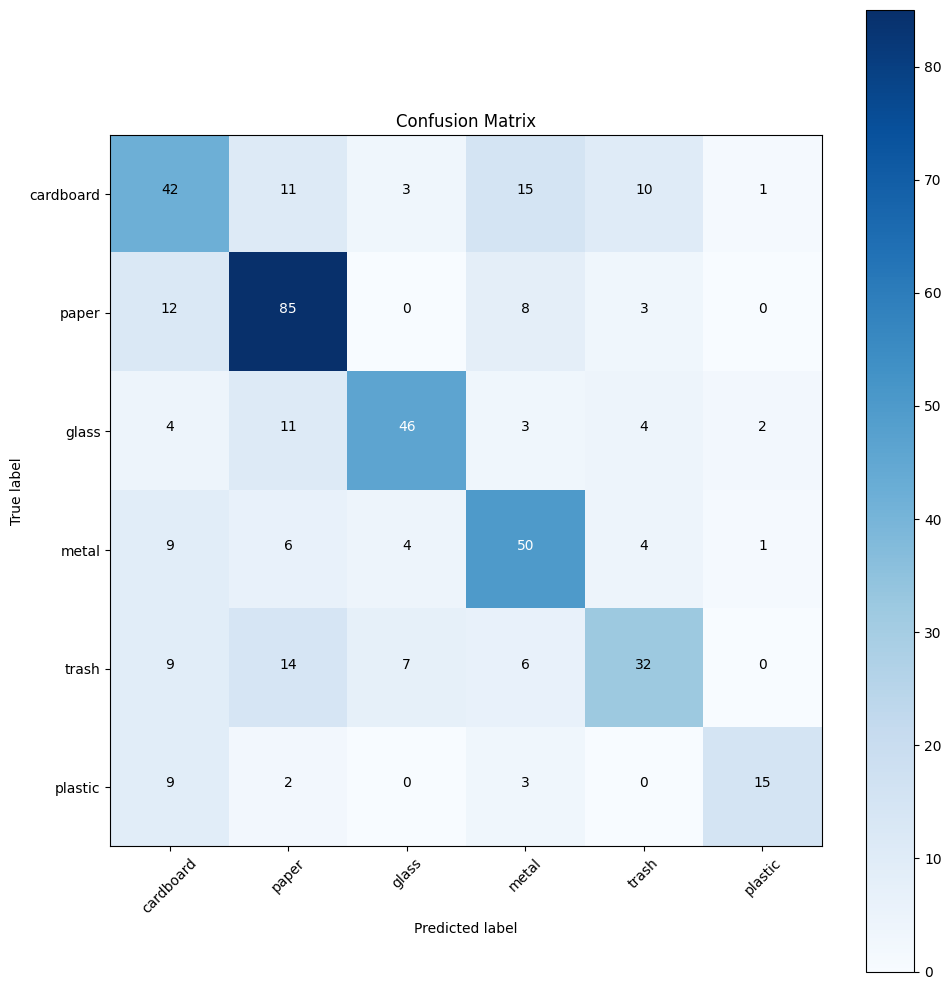

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


target_names = ['cardboard', 'paper', 'glass', 'metal', 'trash', 'plastic']

# Confusion Matrix
cm = confusion_matrix(Y_test, y_rbf_33_00001_test)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(Y_test, y_rbf_33_00001_test, target_names=target_names))

사용한 파일 제거

In [ ]:
'''
save_directory = '/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/valid'

import shutil

shutil.rmtree(save_directory)
'''